# Fourier-Analysis

##### (Quelle: Weitz, HAW Hamburg)

In [1]:
from sympy import *
init_printing(use_latex=True)

approximieren von Funktionen durch Polynome -> Taylorpolynome

approximieren von Funktionen durch Schwingungen -> Fourierpolynome (sin/cos)

Ein Ton besteht aus einem "Grundton" und Obertönen

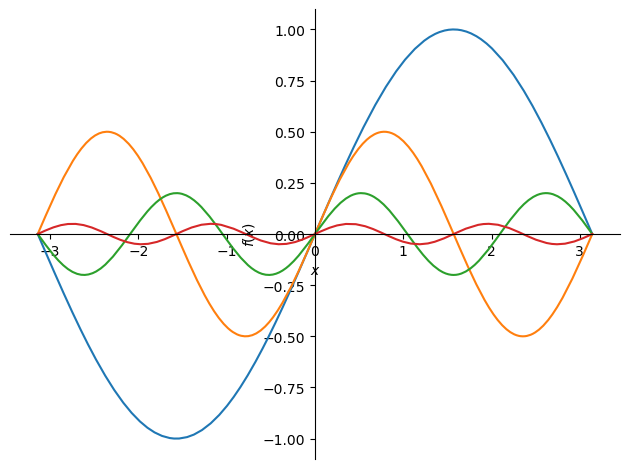

In [2]:
x = symbols('x')
p1 = plot(sin(x),        (x, -pi, pi), show=False)
p2 = plot(0.5*sin(2*x),  (x, -pi, pi), show=False)
p3 = plot(0.2*sin(3*x),  (x, -pi, pi), show=False)
p4 = plot(0.05*sin(4*x), (x, -pi, pi), show=False)
p1.append(p2[0])
p1.append(p3[0])
p1.append(p4[0])
p1.show()

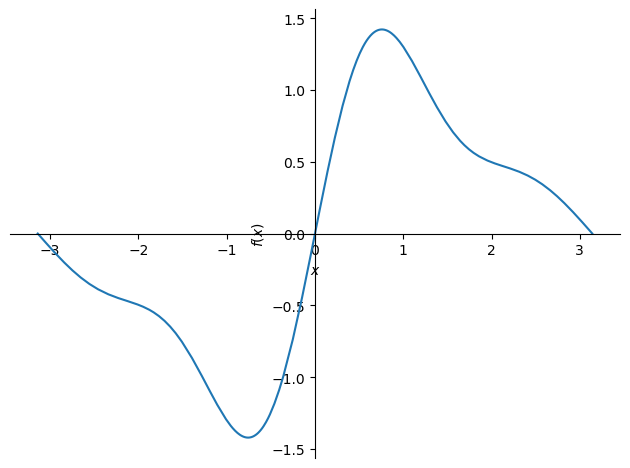

In [3]:
plot(sin(x)+0.5*sin(2*x)+0.3*sin(3*x)+0.05*sin(4*x),   (x, -pi, pi));

man möchte die blaue Funktion als Linearkombination der Basisfunktionen (sin(x), sin(2x), sin(3x),... cos(x), cos(2x),...) darstellen.

wir definieren das Skalarprodukt zweier Funktionen f und g als:

$$
<f,g> = 1/{\pi} \int_{-\pi}^{\pi} f(x)g(x) \mathrm{d} x
$$

und die Norm von f als:

$$
\lVert f \rVert = \sqrt{1/{\pi} \int_{-\pi}^{\pi} f(x)g(x) \mathrm{d} x}
$$

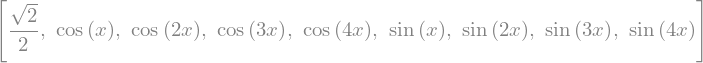

In [4]:
B = [1/sqrt(2)] + [cos(k*x) for k in range(1,5)] + [sin(k*x) for k in range(1,5)]
B

In [5]:
dotProd = lambda f,g: 1/pi * integrate(f*g,(x,-pi,pi))

die Basisfunktionen sind paarweise orthogonal (Norm = 0)

In [6]:
[dotProd(B[i],g) for i in range(len(B)) for g in B[i+1:]]

und haben die Norm 1:

In [7]:
norm = lambda f: sqrt(dotProd(f,f))

In [8]:
[norm(f) for f in B]

bei gegebenem f berechnen sich die Fourierpolynome (von Grad n) durch:

$$
F_n f(x) = a_0 / 2 + \sum_{k=1}^n a_k cos(kx) + b_k sin(kx)
$$

$$
a_k = <f,cos(kx)> = 1/{\pi} \int_{-\pi}^{\pi} f(x)cos(kx) \mathrm{d} x \\
b_k = <f,sin(kx)> = 1/{\pi} \int_{-\pi}^{\pi} f(x)sin(kx) \mathrm{d} x
$$

In [9]:
def coeffA (f, k, var = x):
    return integrate(FU['TR8'](f(var)*cos(k*var)), (var,-pi,pi))
def coeffB (f, k, var = x):
    return integrate(FU['TR8'](f(var)*sin(k*var)), (var,-pi,pi))

In [10]:
f = lambda x: sin(x)+0.5*sin(2*x)+0.3*sin(3*x)+0.05*sin(4*x)

In [11]:
[coeffA(f,k) for k in range(0,5)]+\
[coeffB(f,k) for k in range(0,5)]

In [12]:
from scipy.integrate import quad
quad?

In [13]:
def fourier (f,n):
    A= [quad(lambda x: f(x)*cos(k*x),-pi,pi)[0] /pi for k in range(n+1)]
    B= [quad(lambda x: f(x)*sin(k*x),-pi,pi)[0] /pi for k in range(1,n+1)]
    return lambda x:A[0]/2+sum(A[k]*cos(k*x)+B[k-1]*sin(x*k) for k in range(1,n+1))

In [14]:
from plot import *

In [15]:
f = lambda x:x*(x-pi)*(x+pi)

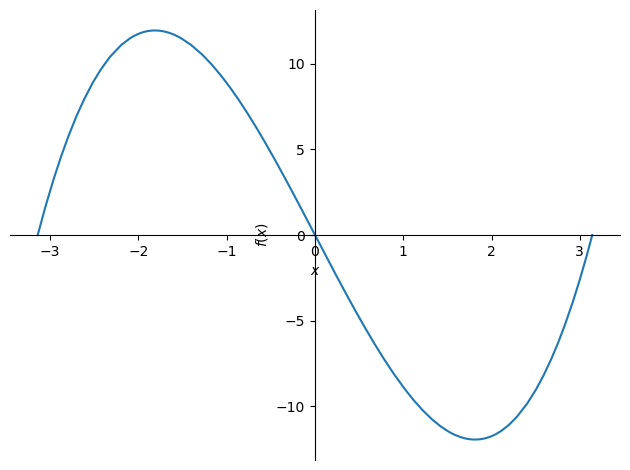

In [16]:
plot(f(x), (x, -pi, pi));

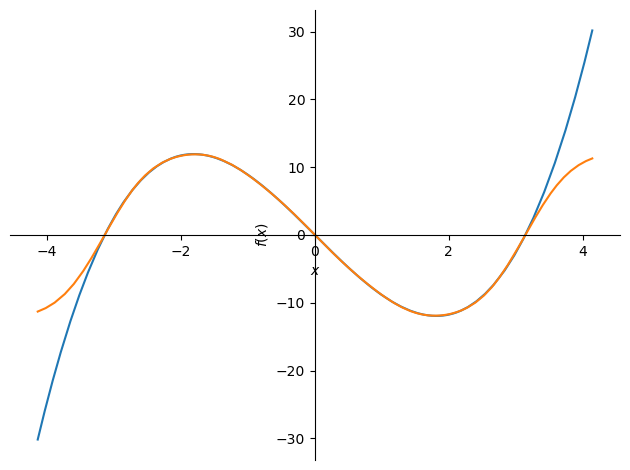

In [20]:
p1 = plot(f(x),        (x, -pi-1, pi+1), show=False)
p2 = plot(fourier(f,5)(x),  (x, -pi-1, pi+1), show=False)
p1.append(p2[0])
p1.show()